**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
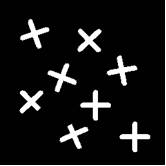
art8lab1.png: 
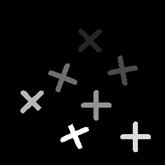
art8lab2.png: 
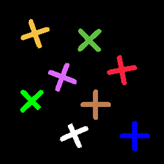
		

In [10]:
!pip install networkx


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


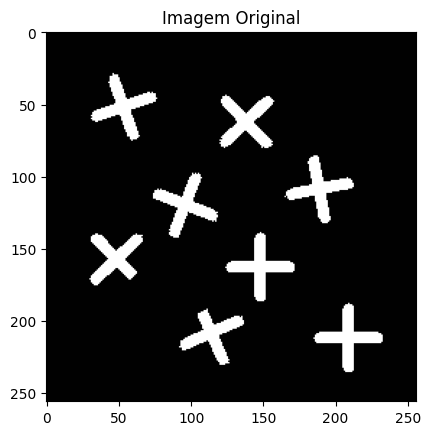

Número de componentes conectados: 9


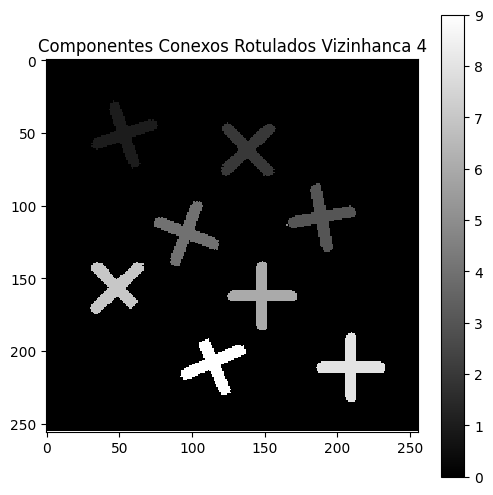

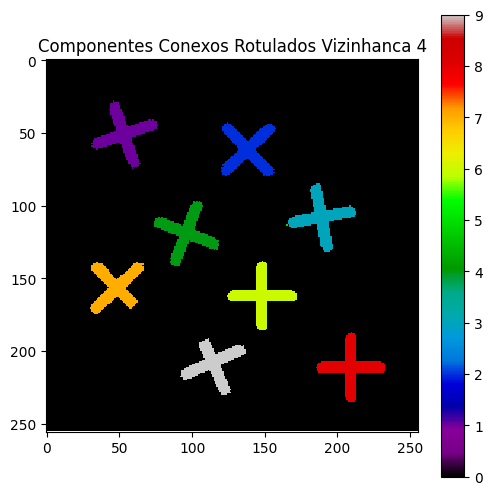

In [28]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def rotular_componentes_conexos(img_binaria):
 
    g = nx.Graph()

    linhas, colunas = img_binaria.shape

    # percorre a matriz e adiciona nós ao grafo
    for l in range(linhas): 
        for c in range(colunas):
            if img_binaria[l, c] == 1:
                g.add_node((l, c))

    # adiciona arestas para conectar os nós vizinhos (4)
    for l in range(linhas):
        for c in range(colunas):
            if img_binaria[l, c] == 1:
                if l > 0 and img_binaria[l-1, c] == 1:  # Vizinho acima
                    g.add_edge((l, c), (l-1, c))
                if l < linhas - 1 and img_binaria[l+1, c] == 1:  # Vizinho abaixo
                    g.add_edge((l, c), (l+1, c))
                if c > 0 and img_binaria[l, c-1] == 1:  # Vizinho à esquerda
                    g.add_edge((l, c), (l, c-1))
                if c < colunas - 1 and img_binaria[l, c+1] == 1:  # Vizinho à direita
                    g.add_edge((l, c), (l, c+1))

    # encontra os componentes conectados no grafo 
    componentes = list(nx.connected_components(g))
    
    # cria uma nova imagem com os rótulos
    imagem_rotulada = np.zeros_like(img_binaria)
    for label, componente in enumerate(componentes, 1):
        for (l, c) in componente:
            imagem_rotulada[l, c] = label
    
    return imagem_rotulada, componentes


# carrega a imagem 
img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

# plota a imagem original
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

# binarizacao da imagem
img_binaria = np.array(img) // 255 

imagem_rotulada, componentes = rotular_componentes_conexos(img_binaria)
# Conta o número de componentes conectados
numero_de_componentes = len(componentes)

# Exibe a quantidade de componentes conectados
print(f"Número de componentes conectados: {numero_de_componentes}")
# plota a imagem rotulada em tons de cinza
plt.figure(figsize=(6, 6))
plt.imshow(imagem_rotulada, cmap='gray', interpolation='nearest')
plt.title("Componentes Conexos Rotulados Vizinhanca 4")
plt.colorbar()
plt.show()

# plota a imagem rotulada colorida
plt.figure(figsize=(6, 6))
plt.imshow(imagem_rotulada, cmap='nipy_spectral', interpolation='nearest')
plt.title("Componentes Conexos Rotulados Vizinhanca 4")
plt.colorbar()
plt.show()

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)

		

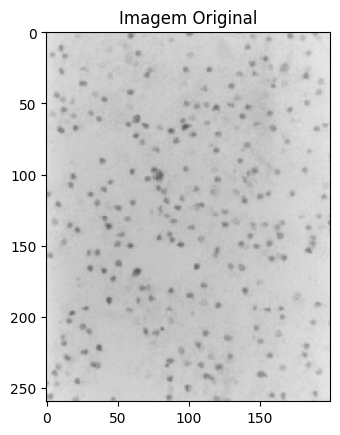

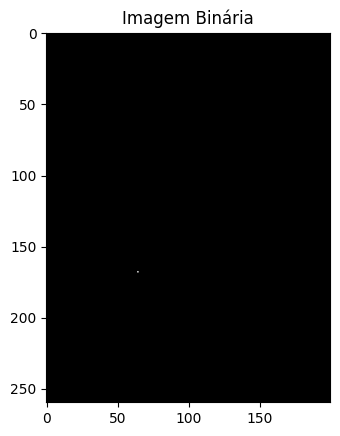

Número de objetos na imagem: 1


In [44]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)

# plota a imagem original
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.show()

# binariza a imagem com threshold de 67
_, img_binaria = cv2.threshold(img, 90, 1, cv2.THRESH_BINARY_INV)

# plota a imagem binária
plt.imshow(img_binaria, cmap='gray', vmin=0, vmax=1)
plt.title("Imagem Binária")
plt.show()

# rotula os componentes conectados
imagem_rotulada, componentes = rotular_componentes_conexos(img_binaria)

# pega o numero de componentes conectados
numero_objetos = len(componentes)
print(f"Número de objetos na imagem: {numero_objetos}")

